Draw some timeseries plots.

Load the data created by the script `scripts/assemble_flows.py`:

In [1]:
import pandas as pd
flows = pd.read_csv('../data/flows.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Steel products

These show timeseries of steel products: exports, home deliveries, and imports.

In [3]:
LONG_PRODUCTS = ['Bright bars', 'Hot rolled bars in lengths', 'Heavy sections', 'Light sections', 'Railway track material',
    'Rods', 'Reinforcing bar', 'Tubes and pipes']
FLAT_PRODUCTS = ['Cold rolled', 'Electro coated', 'Hot dipped galvanised', 'Hot rolled',
    'Organic coated', 'Plate', 'Sheet piling and rolled accessories','Tin plate', ]

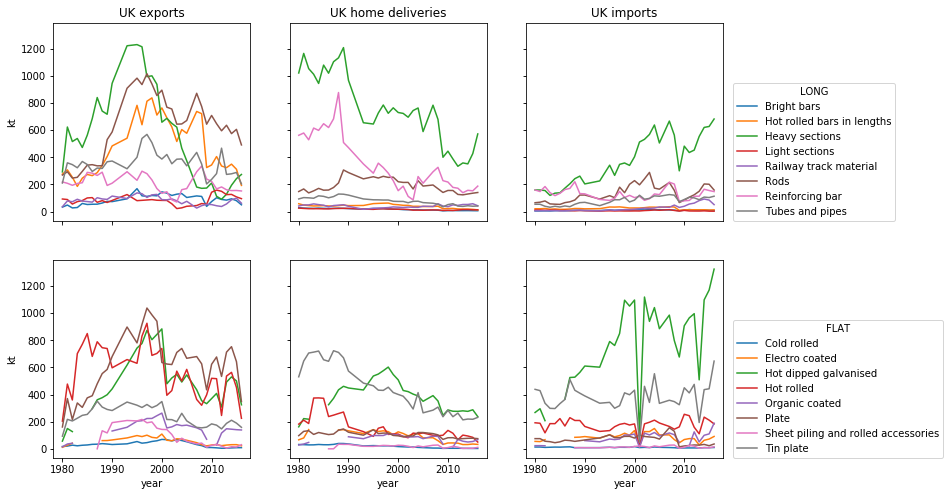

In [4]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))

def plot_products(axes, df, title):
    df = df.pivot_table(index='material', columns='year', values='value').T
    df[LONG_PRODUCTS].plot(ax=axes[0], legend=False)
    df[FLAT_PRODUCTS].plot(ax=axes[1], legend=False)
    axes[0].set_title(title)
    

# UK production to exports
df = flows[(flows['source'] == 'uk_production') & (flows['target'] == 'exports')]
plot_products(ax[:, 0], df, 'UK exports')

# UK production home deliveries
df = flows[(flows['source'] == 'uk_production') & (flows['target'].str.startswith('sector '))]
plot_products(ax[:, 1], df, 'UK home deliveries')

# UK imports of steel products
df = flows[(flows['source'] == 'imports') & (flows['target'].str.startswith('sector '))]
plot_products(ax[:, 2], df, 'UK imports')
    
ax[0, 0].set_ylabel('kt')
ax[1, 0].set_ylabel('kt')
ax[0, 2].legend(loc=(1.05, 0), title='LONG');
ax[1, 2].legend(loc=(1.05, 0), title='FLAT');

## Sectors

These plots show timeseries of sector outputs.

In [5]:
sector_details = pd.read_csv('../allocations/alloc_products_sectors_home.csv', index_col=0,
                             usecols=['sector_code', 'sector_group', 'sector_name'])

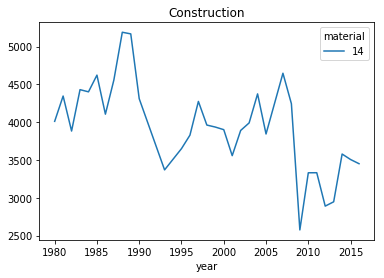

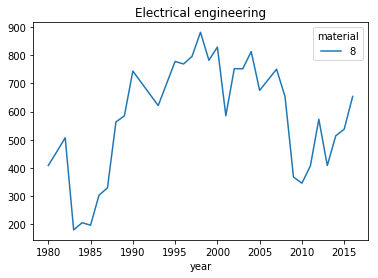

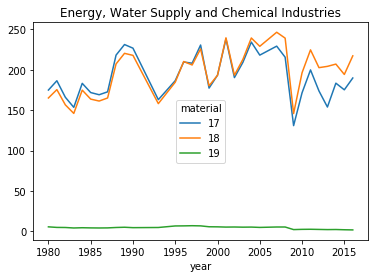

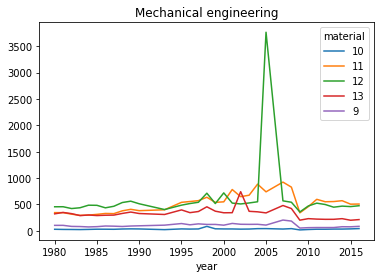

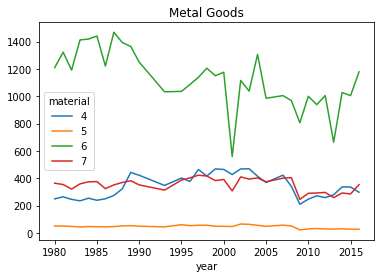

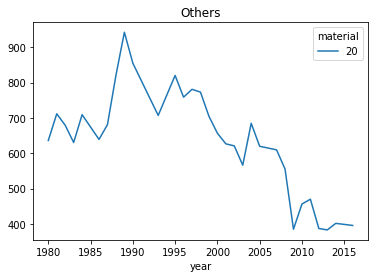

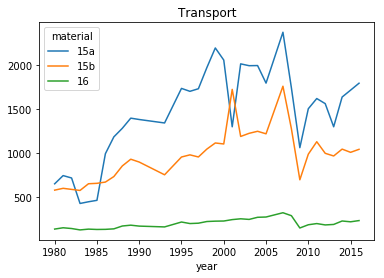

In [6]:
df = flows[flows.source.str.startswith('sector ') &
           flows.target.str.startswith('products ')] \
     .join(sector_details, on='material')

for k, d in df.groupby('sector_group'):
    d.pivot_table(values='value', index='year', columns='material').plot()
    plt.title(k)